# PROJECT: NASDAQ

- Date: Feb 24, 2023
-------------------------------------------------------------
**Goal: Predicting the price of the Nasdaq 100 index and top 5 stocks 55 days later**

- **Index**: NASDAQ 100
- **Stocks**: Apple, Microsoft, Alphabet, Amazon, Meta
- **US Economic Data**: US Consumer Price Index Yearly and US Interest Rate

# Project Roadmap
1. Data Collection
    - Source of Data
    - Import Libraries
    - Import Datasets
2. Data Preprocessing
    - Features Preprocessing
    - Merge Datasets
3. Exploratory Data Analysis
    - Data Visualization For Understanding Data
    - Correlation Between Stocks and Index
    - Create New Features (Technical Analysis)
    - Visualization of New Features
4. Model Development
    - Preparation Train & Test Sets
    - PyTorch Model #1
    - PyTorch Model #2
    - PyTorch Model #3
    - Optimization
5. Model Deployment
    - Final Model
    - Demo Testing

# 1. Data Collection

### 1.1 Source of Data

*TimeFrame: (2015.01.01 - 2023.02.16)*

- **Nasdaq 100 (NDX)** https://www.investing.com/indices/nq-100-historical-data

---------------------------------------------------------------
- **Apple (AAPL)** https://www.investing.com/equities/apple-computer-inc
- **Microsoft (MSFT)** https://www.investing.com/equities/microsoft-corp
- **Alphabet C (GOOG)** https://www.investing.com/equities/google-inc-c
- **Amazon.com (AMZN)** https://www.investing.com/equities/amazon-com-inc
- **Meta Platforms (META)** https://www.investing.com/equities/facebook-inc
---------------------------------------------------------------
- **U.S. Consumer Price Index (CPI) YoY** https://www.investing.com/economic-calendar/cpi-733
- **Fed Interest Rate Decision** https://www.investing.com/economic-calendar/interest-rate-decision-168

### 1.2 Import Libraries

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#-------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
#-------------------------------------------------------
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
#-------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [128]:
torch.cuda.is_available()

True

In [129]:
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### 1.3 Import Datasets

#### Nasdaq 100 (NDX)

> The Nasdaq-100 is a stock market index made up of 101 equity securities issued by 100 of the largest non-financial companies listed on the Nasdaq stock exchange. It is a modified capitalization-weighted index. (Wikipedia)

- Date
- Price: Last price during a trading session
- Open: Open price for a trading session
- High: Highest price during trading session
- Low: Lowest price during trading session
- Vol: Trading volume
- Change%: Daily Change

In [130]:
df_NDX = pd.read_csv('Data/Nasdaq 100 Historical Data.csv')
df_NDX

,Date,Price,Open,High,Low,Vol.,Change %
0,02/16/2023,"12,619.33","12,498.73","12,653.08","12,468.68",138.67M,-0.54%
1,02/15/2023,"12,687.89","12,529.97","12,688.17","12,487.15",246.86M,0.77%
2,02/14/2023,"12,590.89","12,410.01","12,627.40","12,358.59",272.42M,0.71%
3,02/13/2023,"12,502.31","12,357.54","12,522.63","12,313.83",255.75M,1.60%
4,02/10/2023,"12,304.92","12,309.51","12,372.89","12,204.28",266.69M,-0.62%
...,...,...,...,...,...,...,...
2041,01/08/2015,"4,240.55","4,195.49","4,247.93","4,192.63",201.71M,1.94%
2042,01/07/2015,"4,160.00","4,139.85","4,169.97","4,126.39",178.56M,1.20%
2043,01/06/2015,"4,110.83","4,174.78","4,176.26","4,090.33",195.67M,-1.20%
2044,01/05/2015,"4,160.96","4,206.55","4,210.96","4,151.85",191.88M,-1.64%


#### Apple (AAPL)

In [131]:
df_AAPL = pd.read_csv('Data/AAPL Historical Data.csv')
df_AAPL

,Date,Price,Open,High,Low,Vol.,Change %
0,02/16/2023,156.22,153.53,156.32,153.39,41.66M,0.57%
1,02/15/2023,155.33,153.11,155.50,152.88,65.47M,1.39%
2,02/14/2023,153.20,152.12,153.77,150.86,61.71M,-0.42%
3,02/13/2023,153.85,150.95,154.26,150.92,61.86M,1.88%
4,02/10/2023,151.01,149.46,151.34,149.22,57.45M,0.09%
...,...,...,...,...,...,...,...
2042,01/08/2015,27.97,27.31,28.04,27.18,237.46M,3.82%
2043,01/07/2015,26.94,26.80,27.05,26.67,160.42M,1.39%
2044,01/06/2015,26.57,26.64,26.86,26.16,263.19M,0.04%
2045,01/05/2015,26.56,27.07,27.16,26.35,257.14M,-2.82%


#### Microsoft (MSFT)

In [132]:
df_MSFT = pd.read_csv('Data/MSFT Historical Data.csv')
df_MSFT

,Date,Price,Open,High,Low,Vol.,Change %
0,02/16/2023,265.29,264.03,266.70,263.15,17.44M,-1.50%
1,02/15/2023,269.32,268.32,270.73,266.18,28.36M,-1.05%
2,02/14/2023,272.17,272.67,274.97,269.28,37.05M,0.31%
3,02/13/2023,271.32,267.64,274.60,267.15,44.43M,3.12%
4,02/10/2023,263.10,261.53,264.09,260.66,25.82M,-0.20%
...,...,...,...,...,...,...,...
2042,01/08/2015,47.59,46.75,47.75,46.72,29.65M,2.94%
2043,01/07/2015,46.23,45.98,46.46,45.49,29.11M,1.27%
2044,01/06/2015,45.65,46.38,46.75,45.54,36.45M,-1.47%
2045,01/05/2015,46.33,46.37,46.73,46.25,39.67M,-0.92%


#### Alphabet (GOOG)

In [133]:
df_GOOG = pd.read_csv('Data/GOOG Historical Data.csv')
df_GOOG

,Date,Price,Open,High,Low,Vol.,Change %
0,02/16/2023,97.18,95.72,97.88,95.04,24.67M,0.08%
1,02/15/2023,97.10,94.74,97.34,94.36,36.89M,2.26%
2,02/14/2023,94.95,94.66,95.18,92.65,42.51M,-0.05%
3,02/13/2023,95.00,95.01,95.35,94.05,42.97M,0.15%
4,02/10/2023,94.86,95.74,97.02,94.53,49.33M,-0.63%
...,...,...,...,...,...,...,...
2041,01/08/2015,25.07,24.83,25.11,24.48,67.07M,0.32%
2042,01/07/2015,24.99,25.28,25.29,24.91,41.30M,-0.16%
2043,01/06/2015,25.03,25.68,25.74,24.98,58.00M,-2.30%
2044,01/05/2015,25.62,26.09,26.14,25.58,41.20M,-2.10%


#### Amazon (AMZN)

In [134]:
df_AMZN = pd.read_csv('Data/AMZN Historical Data.csv')
df_AMZN

,Date,Price,Open,High,Low,Vol.,Change %
0,02/16/2023,99.98,99.29,100.62,98.38,35.55M,-1.17%
1,02/15/2023,101.16,99.09,101.17,98.45,47.44M,1.46%
2,02/14/2023,99.70,98.41,100.92,97.52,56.20M,0.16%
3,02/13/2023,99.54,97.85,99.68,96.91,52.66M,1.98%
4,02/10/2023,97.61,97.56,98.82,96.23,52.74M,-0.64%
...,...,...,...,...,...,...,...
2041,01/08/2015,15.02,15.02,15.16,14.81,61.77M,0.67%
2042,01/07/2015,14.92,14.88,15.06,14.77,52.81M,1.08%
2043,01/06/2015,14.76,15.11,15.15,14.62,70.38M,-2.32%
2044,01/05/2015,15.11,15.35,15.42,15.04,55.48M,-2.07%


#### Meta (META)

In [135]:
df_META = pd.read_csv('Data/META Historical Data.csv')
df_META

,Date,Price,Open,High,Low,Vol.,Change %
0,02/16/2023,175.44,172.72,175.84,171.91,17.86M,-0.97%
1,02/15/2023,177.16,176.41,178.19,175.33,24.92M,-1.29%
2,02/14/2023,179.48,177.16,181.51,175.88,23.97M,0.03%
3,02/13/2023,179.43,178.21,181.00,175.82,31.41M,3.03%
4,02/10/2023,174.15,176.35,178.89,173.35,33.43M,-2.12%
...,...,...,...,...,...,...,...
2042,01/08/2015,78.17,76.74,78.23,76.08,23.96M,2.65%
2043,01/07/2015,76.15,76.76,77.36,75.82,22.05M,0.00%
2044,01/06/2015,76.15,77.23,77.59,75.36,27.40M,-1.35%
2045,01/05/2015,77.19,77.98,79.25,76.86,26.45M,-1.61%


#### U.S. Consumer Price Index (CPI) YoY 

> The CPI is one of the most popular measures of inflation and deflation.
The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time.The CPI is the most widely used measure of inflation, closely followed by policymakers, financial markets, businesses, and consumers. (Investopedia)

- Release Date: CPI data published date
- Time: CPI data published time
- Actual: Actual is what the actual reported value for this time is
- Forecast: Forecast is what the analysts/economists think the value will be this time
- Previous: Previous is the value of the data the last time it was released

In [136]:
df_CPI = pd.read_csv('Data/US CPI.csv')
df_CPI

,Release Date,Time,Actual,Forecast,Previous
0,2023.02.14,08:30,6.40%,6.20%,6.50%
1,2023.01.12,08:30,6.50%,6.50%,7.10%
2,2022.12.13,08:30,7.10%,7.30%,7.70%
3,2022.11.10,08:30,7.70%,8.00%,8.20%
4,2022.10.13,07:30,8.20%,8.10%,8.30%
...,...,...,...,...,...
94,2015.04.17,07:30,-0.10%,0.10%,0.00%
95,2015.03.24,07:30,0.00%,-0.10%,-0.10%
96,2015.02.26,08:30,-0.10%,-0.10%,0.80%
97,2015.01.16,08:30,0.80%,0.70%,1.30%


#### Fed Interest Rate

> An interest rate set by the Federal Reserve to indirectly manage interest rates, inflation and unemployment. The term federal funds rate refers to the target interest rate set by the Federal Open Market Committee (FOMC). This target is the rate at which commercial banks borrow and lend their excess reserves to each other overnight. The FOMC, which is the policymaking body of the Federal Reserve System, meets eight times a year to set the target federal funds rate, which is part of its monetary policy. This is used to help promote economic growth.(Investopedia)

- Release Date: U.S. Interest Rate published date
- Time: U.S. Interest Rate published time
- Actual: Actual is what the actual reported value for this time is
- Forecast: Forecast is what the analysts/economists think the value will be this time
- Previous: Previous is the value of the data the last time it was released

In [137]:
df_RATE = pd.read_csv('Data/US Interest Rate.csv')
df_RATE

,Release Date,Time,Actual,Forecast,Previous
0,2023.02.01,14:00,4.75%,4.75%,4.50%
1,2022.12.14,14:00,4.50%,4.50%,4.00%
2,2022.11.02,13:00,4.00%,4.00%,3.25%
3,2022.09.21,13:00,3.25%,3.25%,2.50%
4,2022.07.27,13:00,2.50%,2.50%,1.75%
...,...,...,...,...,...
62,2015.06.17,13:00,0.25%,0.25%,0.25%
63,2015.04.29,13:00,0.25%,0.25%,0.25%
64,2015.03.18,13:00,0.25%,0.25%,0.25%
65,2015.01.28,14:00,0.25%,0.25%,0.25%


# 2. Data Preprocessing

### 2.1 Features Preprocessing

In [138]:
def Instrument_Preprocessing(df,name):
    df = df.rename(columns={'Date':'DATE','Price':name})
    df['DATE'] = pd.to_datetime(df.DATE)
    df[name] = df[name].apply(lambda x: float(str(x).replace(',', '')))
    df.drop(['Open','High','Low','Vol.','Change %'], axis = 1, inplace = True)
    
    return df

In [139]:
def Economic_Indicator_Preprocessing(df,name):
    df = df.rename(columns={'Release Date': 'DATE','Actual': name})
    df['DATE'] = pd.to_datetime(df.DATE)
    df[name] = df[name].apply(lambda x: str(x).replace(',', ''))
    df[name] = df[name].apply(lambda x: float(str(x).strip('%')))
    df.drop(['Time','Forecast','Previous'], axis = 1, inplace = True)
    
    return df

In [140]:
df_NDX = Instrument_Preprocessing(df_NDX,'NDX')
df_AAPL = Instrument_Preprocessing(df_AAPL,'AAPL')
df_MSFT = Instrument_Preprocessing(df_MSFT,'MSFT')
df_GOOG = Instrument_Preprocessing(df_GOOG,'GOOG')
df_AMZN = Instrument_Preprocessing(df_AMZN,'AMZN')
df_META = Instrument_Preprocessing(df_META,'META')

In [141]:
df_CPI = Economic_Indicator_Preprocessing(df_CPI,'CPI')
df_RATE = Economic_Indicator_Preprocessing(df_RATE,'RATE')

### 2.2 Merge Datasets

In [142]:
merged_df = df_NDX
merged_df = merged_df.merge(df_AAPL, on='DATE', how='outer')
merged_df = merged_df.merge(df_MSFT, on='DATE', how='outer')
merged_df = merged_df.merge(df_GOOG, on='DATE', how='outer')
merged_df = merged_df.merge(df_AMZN, on='DATE', how='outer')
merged_df = merged_df.merge(df_META, on='DATE', how='outer')
merged_df = merged_df.dropna()
merged_df

,DATE,NDX,AAPL,MSFT,GOOG,AMZN,META
0,2023-02-16,12619.33,156.22,265.29,97.18,99.98,175.44
1,2023-02-15,12687.89,155.33,269.32,97.10,101.16,177.16
2,2023-02-14,12590.89,153.20,272.17,94.95,99.70,179.48
3,2023-02-13,12502.31,153.85,271.32,95.00,99.54,179.43
4,2023-02-10,12304.92,151.01,263.10,94.86,97.61,174.15
...,...,...,...,...,...,...,...
2041,2015-01-08,4240.55,27.97,47.59,25.07,15.02,78.17
2042,2015-01-07,4160.00,26.94,46.23,24.99,14.92,76.15
2043,2015-01-06,4110.83,26.57,45.65,25.03,14.76,76.15
2044,2015-01-05,4160.96,26.56,46.33,25.62,15.11,77.19


In [143]:
merged_df.describe()

,NDX,AAPL,MSFT,GOOG,AMZN,META
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,8419.382380,74.117195,144.559673,68.345606,88.435655,181.029565
std,3632.089292,49.355166,88.936549,34.197325,49.588014,72.780851
min,3947.800000,22.590000,40.290000,24.560000,14.350000,74.050000
25%,5046.040000,32.535000,63.175000,40.147500,41.387500,125.902500
50%,7351.755000,48.805000,111.730000,57.365000,87.490000,171.135000
75%,11668.835000,125.882500,227.360000,89.782500,126.065000,209.187500
max,16573.340000,182.010000,343.110000,150.710000,186.570000,382.180000


In [144]:
merged_df = merged_df.merge(df_CPI, on='DATE', how='outer').merge(df_RATE, on='DATE', how='outer')
merged_df

,DATE,NDX,AAPL,MSFT,GOOG,AMZN,META,CPI,RATE
0,2023-02-16,12619.33,156.22,265.29,97.18,99.98,175.44,NaN,NaN
1,2023-02-15,12687.89,155.33,269.32,97.10,101.16,177.16,NaN,NaN
2,2023-02-14,12590.89,153.20,272.17,94.95,99.70,179.48,6.4,NaN
3,2023-02-13,12502.31,153.85,271.32,95.00,99.54,179.43,NaN,NaN
4,2023-02-10,12304.92,151.01,263.10,94.86,97.61,174.15,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2045,2015-01-02,4230.24,27.33,46.76,26.17,15.43,78.45,NaN,NaN
2046,2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN
2047,2017-04-14,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN
2048,2014-12-17,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.25


In [145]:
sorted_df = merged_df.sort_values('DATE')
sorted_df

,DATE,NDX,AAPL,MSFT,GOOG,AMZN,META,CPI,RATE
2048,2014-12-17,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.25
2045,2015-01-02,4230.24,27.33,46.76,26.17,15.43,78.45,NaN,NaN
2044,2015-01-05,4160.96,26.56,46.33,25.62,15.11,77.19,NaN,NaN
2043,2015-01-06,4110.83,26.57,45.65,25.03,14.76,76.15,NaN,NaN
2042,2015-01-07,4160.00,26.94,46.23,24.99,14.92,76.15,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4,2023-02-10,12304.92,151.01,263.10,94.86,97.61,174.15,NaN,NaN
3,2023-02-13,12502.31,153.85,271.32,95.00,99.54,179.43,NaN,NaN
2,2023-02-14,12590.89,153.20,272.17,94.95,99.70,179.48,6.4,NaN
1,2023-02-15,12687.89,155.33,269.32,97.10,101.16,177.16,NaN,NaN


In [146]:
sorted_df['NDX'].fillna(method='ffill', inplace=True)
sorted_df['AAPL'].fillna(method='ffill', inplace=True)
sorted_df['MSFT'].fillna(method='ffill', inplace=True)
sorted_df['GOOG'].fillna(method='ffill', inplace=True)
sorted_df['AMZN'].fillna(method='ffill', inplace=True)
sorted_df['META'].fillna(method='ffill', inplace=True)
sorted_df['CPI'].fillna(method='ffill', inplace=True)
sorted_df['RATE'].fillna(method='ffill', inplace=True)
sorted_df

,DATE,NDX,AAPL,MSFT,GOOG,AMZN,META,CPI,RATE
2048,2014-12-17,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.25
2045,2015-01-02,4230.24,27.33,46.76,26.17,15.43,78.45,1.3,0.25
2044,2015-01-05,4160.96,26.56,46.33,25.62,15.11,77.19,1.3,0.25
2043,2015-01-06,4110.83,26.57,45.65,25.03,14.76,76.15,1.3,0.25
2042,2015-01-07,4160.00,26.94,46.23,24.99,14.92,76.15,1.3,0.25
...,...,...,...,...,...,...,...,...,...
4,2023-02-10,12304.92,151.01,263.10,94.86,97.61,174.15,6.5,4.75
3,2023-02-13,12502.31,153.85,271.32,95.00,99.54,179.43,6.5,4.75
2,2023-02-14,12590.89,153.20,272.17,94.95,99.70,179.48,6.4,4.75
1,2023-02-15,12687.89,155.33,269.32,97.10,101.16,177.16,6.4,4.75


In [147]:
df = sorted_df[1:]
df = df.reset_index(drop=True)
df

,DATE,NDX,AAPL,MSFT,GOOG,AMZN,META,CPI,RATE
0,2015-01-02,4230.24,27.33,46.76,26.17,15.43,78.45,1.3,0.25
1,2015-01-05,4160.96,26.56,46.33,25.62,15.11,77.19,1.3,0.25
2,2015-01-06,4110.83,26.57,45.65,25.03,14.76,76.15,1.3,0.25
3,2015-01-07,4160.00,26.94,46.23,24.99,14.92,76.15,1.3,0.25
4,2015-01-08,4240.55,27.97,47.59,25.07,15.02,78.17,1.3,0.25
...,...,...,...,...,...,...,...,...,...
2044,2023-02-10,12304.92,151.01,263.10,94.86,97.61,174.15,6.5,4.75
2045,2023-02-13,12502.31,153.85,271.32,95.00,99.54,179.43,6.5,4.75
2046,2023-02-14,12590.89,153.20,272.17,94.95,99.70,179.48,6.4,4.75
2047,2023-02-15,12687.89,155.33,269.32,97.10,101.16,177.16,6.4,4.75


In [148]:
df['DIFF_CPI_RATE'] = df['CPI']-df['RATE']
df

,DATE,NDX,AAPL,MSFT,GOOG,AMZN,META,CPI,RATE,DIFF_CPI_RATE
0,2015-01-02,4230.24,27.33,46.76,26.17,15.43,78.45,1.3,0.25,1.05
1,2015-01-05,4160.96,26.56,46.33,25.62,15.11,77.19,1.3,0.25,1.05
2,2015-01-06,4110.83,26.57,45.65,25.03,14.76,76.15,1.3,0.25,1.05
3,2015-01-07,4160.00,26.94,46.23,24.99,14.92,76.15,1.3,0.25,1.05
4,2015-01-08,4240.55,27.97,47.59,25.07,15.02,78.17,1.3,0.25,1.05
...,...,...,...,...,...,...,...,...,...,...
2044,2023-02-10,12304.92,151.01,263.10,94.86,97.61,174.15,6.5,4.75,1.75
2045,2023-02-13,12502.31,153.85,271.32,95.00,99.54,179.43,6.5,4.75,1.75
2046,2023-02-14,12590.89,153.20,272.17,94.95,99.70,179.48,6.4,4.75,1.65
2047,2023-02-15,12687.89,155.33,269.32,97.10,101.16,177.16,6.4,4.75,1.65


# 3. Exploratory Data Analysis

### 3.1 Data Visualization For Understanding Data

In [149]:
df.describe()

,NDX,AAPL,MSFT,GOOG,AMZN,META,CPI,RATE,DIFF_CPI_RATE
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,8417.590888,74.092499,144.537828,68.324963,88.421166,181.001147,2.699658,1.143119,1.556540
std,3630.074144,49.326828,88.890515,34.178353,49.562235,72.733842,2.467522,1.042749,2.298159
min,3947.800000,22.590000,40.290000,24.560000,14.350000,74.050000,-0.200000,0.250000,-1.000000
25%,5050.210000,32.550000,63.190000,40.230000,41.440000,126.090000,1.200000,0.250000,0.050000
50%,7352.360000,48.840000,111.750000,57.390000,87.500000,171.110000,1.900000,0.500000,0.700000
75%,11665.370000,125.860000,227.270000,89.700000,125.930000,208.670000,2.700000,1.750000,1.700000
max,16573.340000,182.010000,343.110000,150.710000,186.570000,382.180000,9.100000,4.750000,8.000000


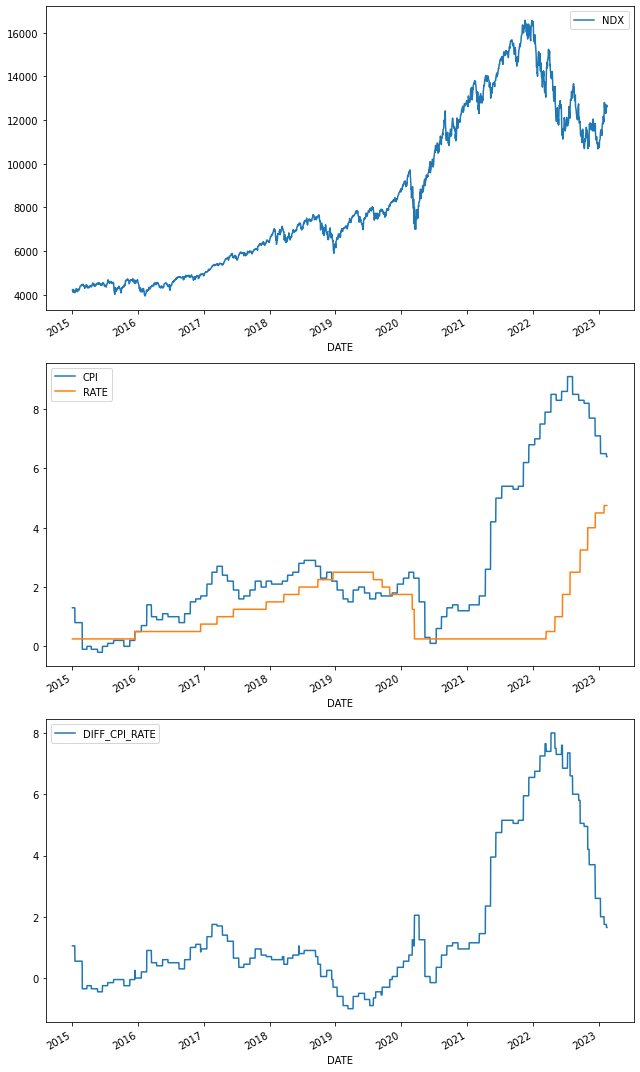

In [150]:
fig, ax = plt.subplots(3, 1, figsize=(9, 15))

df.plot(x='DATE', y=['NDX'], ax=ax[0], kind='line')
df.plot(x='DATE', y=['CPI', 'RATE'], ax=ax[1], kind='line')
df.plot(x='DATE', y=['DIFF_CPI_RATE'], ax=ax[2], kind='line')

plt.tight_layout()
plt.show()

### 3.2 Correlation Between Stocks and Index

In [151]:
corr = df.corr()
corr

,NDX,AAPL,MSFT,GOOG,AMZN,META,CPI,RATE,DIFF_CPI_RATE
NDX,1.000000,0.967969,0.988687,0.978800,0.950653,0.839720,0.698352,0.010784,0.744924
AAPL,0.967969,1.000000,0.978123,0.955416,0.872521,0.694708,0.788858,0.058342,0.820521
MSFT,0.988687,0.978123,1.000000,0.975533,0.924933,0.776760,0.750532,0.066464,0.775686
GOOG,0.978800,0.955416,0.975533,1.000000,0.897340,0.801782,0.782094,0.019427,0.830915
AMZN,0.950653,0.872521,0.924933,0.897340,1.000000,0.896470,0.526296,-0.029294,0.578373
META,0.839720,0.694708,0.776760,0.801782,0.896470,1.000000,0.331739,-0.212177,0.452458
CPI,0.698352,0.788858,0.750532,0.782094,0.526296,0.331739,1.000000,0.368141,0.906658
RATE,0.010784,0.058342,0.066464,0.019427,-0.029294,-0.212177,0.368141,1.000000,-0.058461
DIFF_CPI_RATE,0.744924,0.820521,0.775686,0.830915,0.578373,0.452458,0.906658,-0.058461,1.000000


<AxesSubplot:>

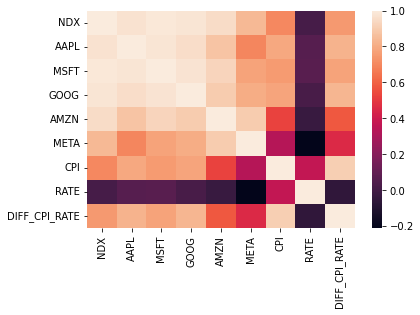

In [152]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

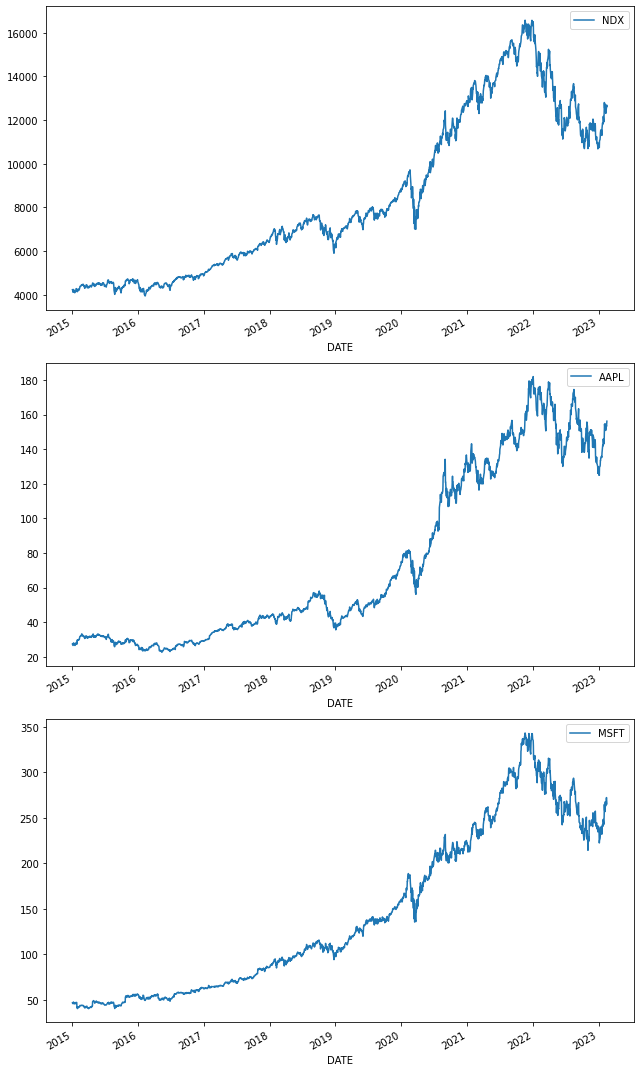

In [153]:
fig, ax = plt.subplots(3, 1, figsize=(9, 15))

df.plot(x='DATE', y=['NDX'], ax=ax[0], kind='line')
df.plot(x='DATE', y=['AAPL'], ax=ax[1], kind='line')
df.plot(x='DATE', y=['MSFT'], ax=ax[2], kind='line')

plt.tight_layout()
plt.show()

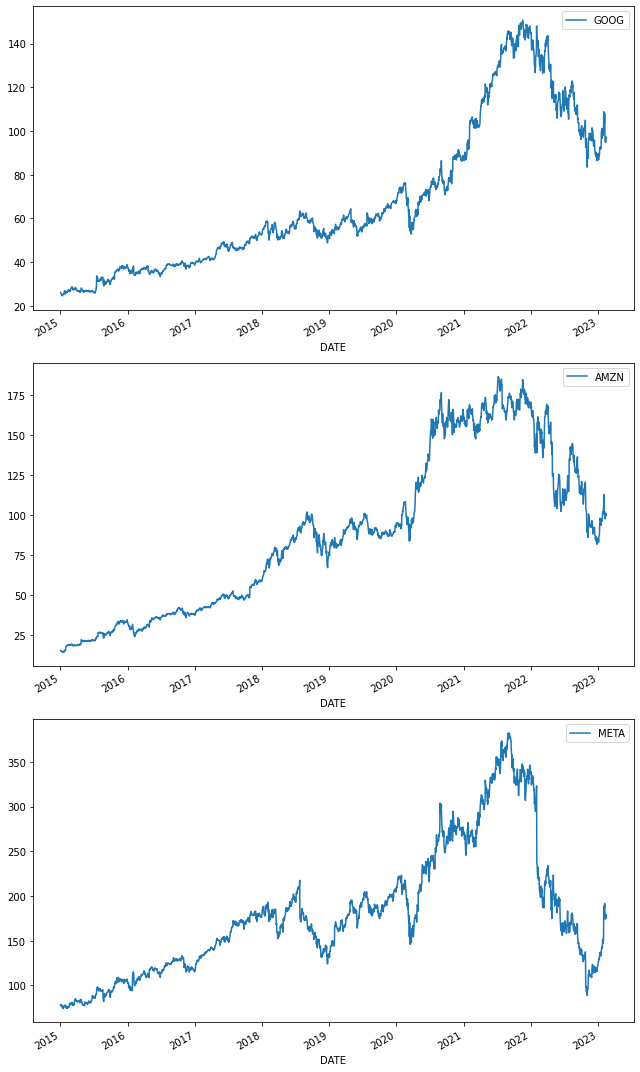

In [154]:
fig, ax = plt.subplots(3, 1, figsize=(9, 15))

df.plot(x='DATE', y=['GOOG'], ax=ax[0], kind='line')
df.plot(x='DATE', y=['AMZN'], ax=ax[1], kind='line')
df.plot(x='DATE', y=['META'], ax=ax[2], kind='line')

plt.tight_layout()
plt.show()

### 3.3 Create New Features (Technical Analysis)

### Four Moments

The four moments in mathematics are statistical measures used to describe the shape and distribution of a set of data. They are:

**Mean or average (μ):** It is the sum of all the values in a set of data divided by the number of values. It gives an idea of the central tendency of the data.

**Standard deviation (σ):** It is a measure of how much the data deviates from the mean. A low standard deviation indicates that the data points tend to be close to the mean, while a high standard deviation indicates that the data points are spread out.

**Skewness (S):** It is a measure of the asymmetry of the distribution. A positive skewness means the data is skewed to the right, while a negative skewness means the data is skewed to the left.

**Kurtosis (K):** It is a measure of the peakedness of the distribution. A high kurtosis indicates a sharp peak, while a low kurtosis indicates a flat peak.

Together, these four moments can provide a comprehensive picture of the shape and distribution of a set of data.

### STO and ROC

Stochastic Indicator and Rate of Change (ROC) are technical analysis tools used to evaluate securities and market trends.

**Stochastic Indicator:** The Stochastic Indicator is a momentum oscillator that measures the level of the closing price of a security relative to its price range over a specific period of time. It helps to identify potential overbought and oversold conditions and potential trend reversals. The Stochastic Indicator is displayed as two lines: %K and %D.

**Rate of Change (ROC):** The Rate of Change (ROC) is a momentum indicator that measures the percentage change between the current price and a past price. It is used to determine whether the security is gaining or losing momentum and to identify potential trend reversals. The ROC is calculated as the current price minus the price n periods ago divided by the price n periods ago.

These tools are used in conjunction with other technical analysis indicators and charts to provide a comprehensive picture of the current market conditions and to help make informed trading decisions. However, it's important to remember that technical analysis should not be the sole decision-making tool, and other factors such as fundamental analysis and risk management should also be considered. 

In [155]:
def Technical_Analysis(df_t,name,window):
    
    df_t['MA'] = df_t[name].rolling(window).mean()
    df_t['STD'] = df_t[name].rolling(window).std()
    df_t['SKEW'] = df_t[name].rolling(window).skew()
    df_t['KURT'] = df_t[name].rolling(window).kurt()
    df_t['MAX'] = df_t[name].rolling(window).max()
    df_t['MIN'] = df_t[name].rolling(window).min()
    
    df_t['ZSCORE'] = (df_t[name]-df_t['MA'])/df_t['STD']
    df_t['STO'] = (df_t[name]-df_t['MIN'])/(df_t['MAX']-df_t['MIN'])
    df_t['ROC'] = df_t[name].pct_change(periods=window)
    
    df_t = df_t[window:]
    df_t = df_t.reset_index(drop=True)
    return df_t

In [156]:
def Plot_Analysis(df_p,name):
    
    fig, ax = plt.subplots(4, 1, figsize=(10, 16))
    
    df_p.plot(x='DATE', y=[name,'MA','MAX','MIN'], ax=ax[0], kind='line')
    plt1 = df_p.plot(x='DATE', y=['ZSCORE'], ax=ax[1], kind='line')
    plt1.axhline(y = 0, color = 'r', linestyle = '-')
    plt2 = df_p.plot(x='DATE', y=['STO'], ax=ax[2], kind='line')
    plt2.axhline(y = 1, color = 'r', linestyle = '-')
    plt2.axhline(y = 0, color = 'r', linestyle = '-')
    plt3= df_p.plot(x='DATE', y=['ROC'], ax=ax[3], kind='line')
    plt3.axhline(y = 0, color = 'r', linestyle = '-')
    
    plt.savefig('Visuals/' + name + '.png', format='png')
    
    plt.tight_layout()
    plt.show()

In [157]:
def Visualization(df_v,name,window):
    df_visual = df_v[['DATE',name]]
    df_visual = Technical_Analysis(df_visual,name,window)
    Plot_Analysis(df_visual,name)

### 3.4 Visualization of New Features

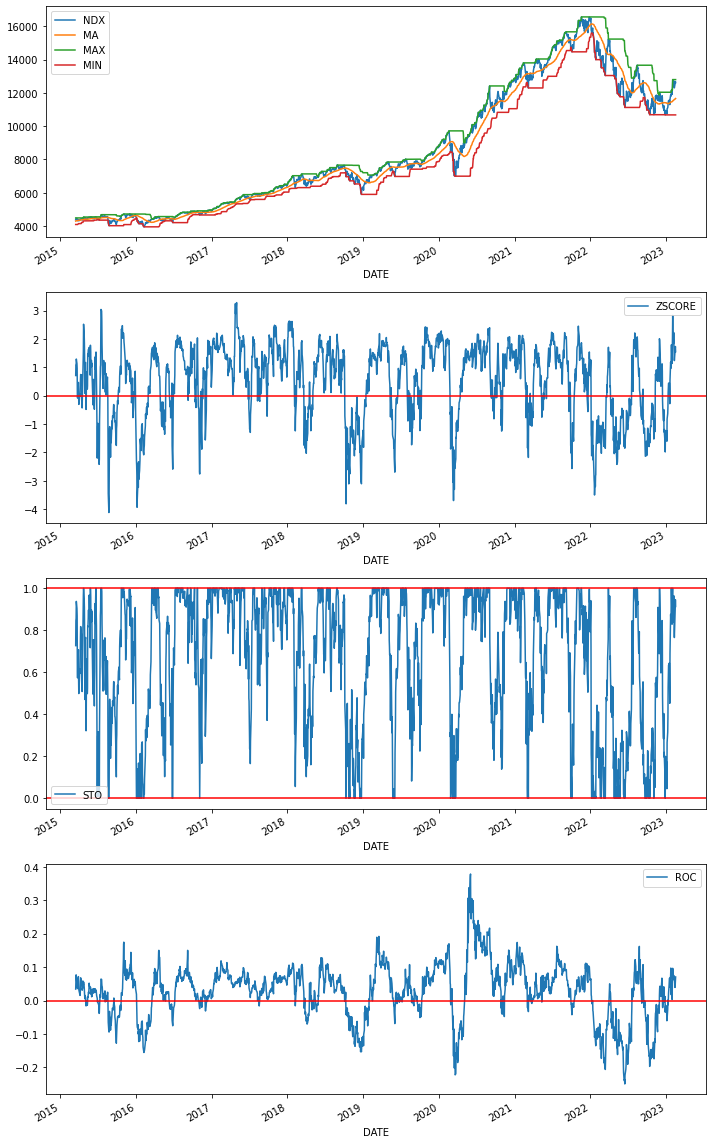

In [158]:
Visualization(df,'NDX',50)

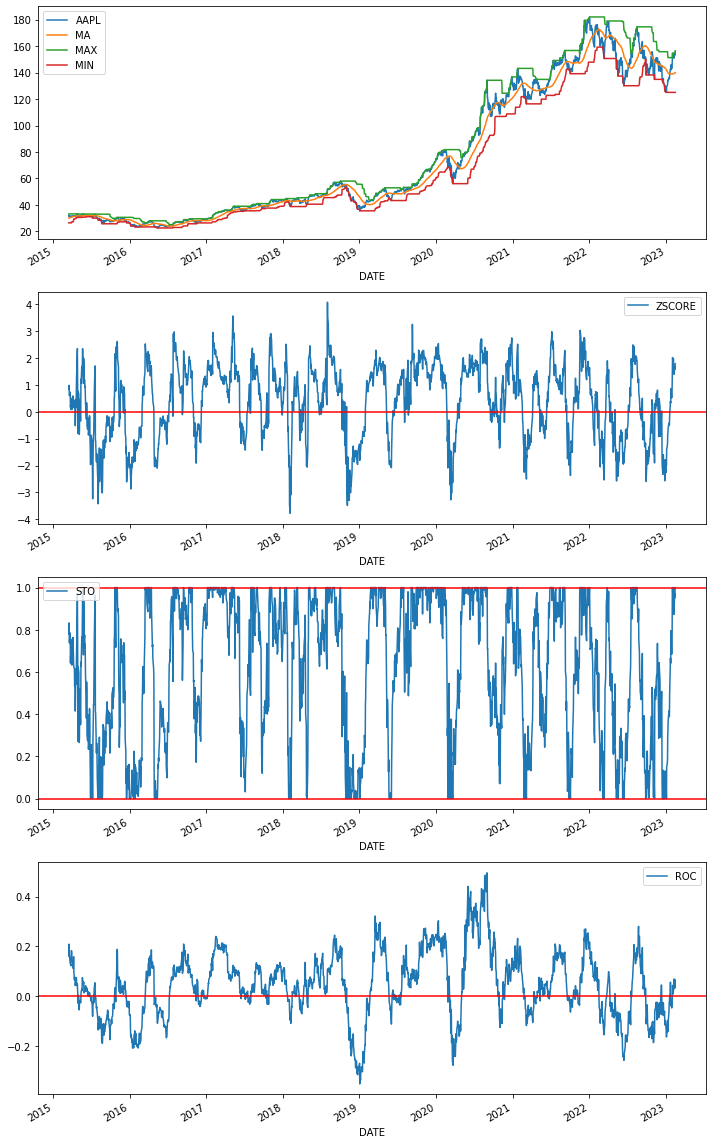

In [159]:
Visualization(df,'AAPL',50)

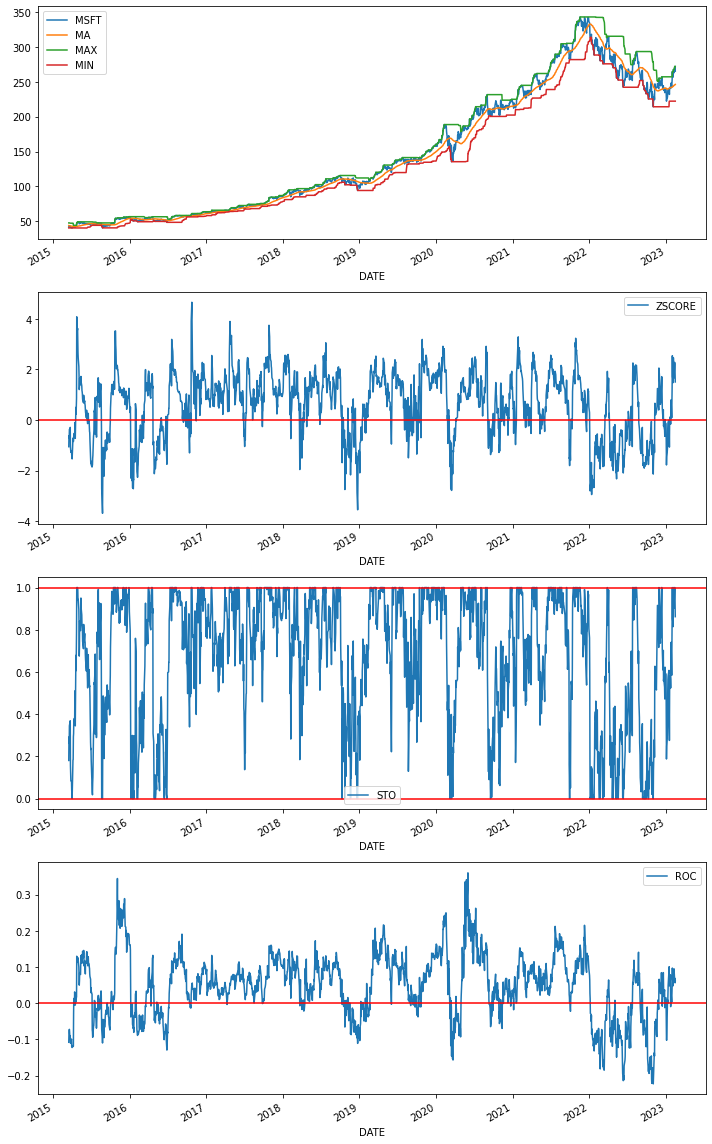

In [160]:
Visualization(df,'MSFT',50)

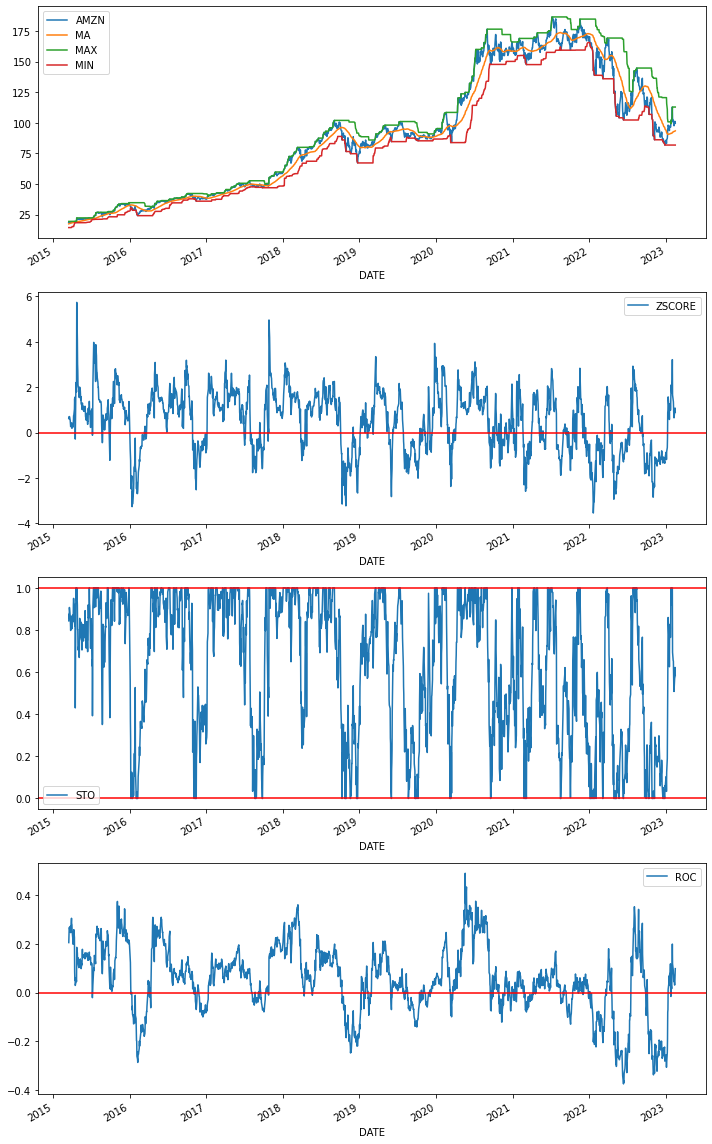

In [161]:
Visualization(df,'AMZN',50)

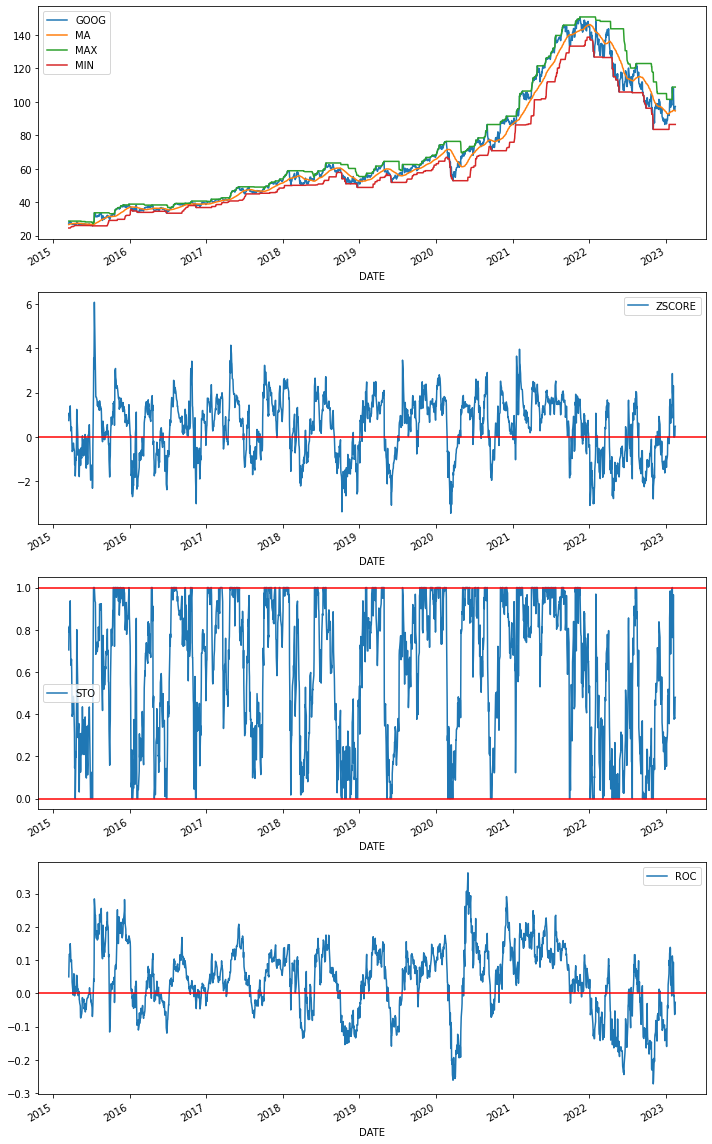

In [162]:
Visualization(df,'GOOG',50)

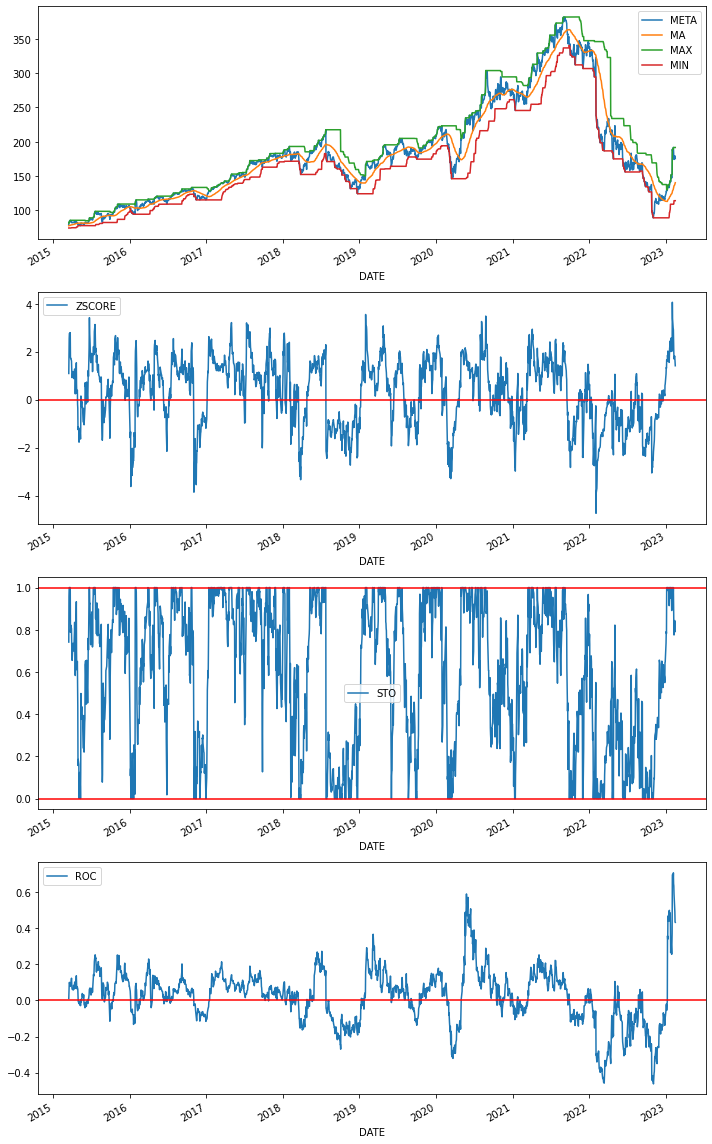

In [163]:
Visualization(df,'META',50)

# 4. Model Development

### 4.1 Preparation Train & Test Sets

In [164]:
def Preparation_For_Future_Prediction(df_pr,name,window,future):
    df_preparation = df_pr[['DATE',name,'CPI','RATE','DIFF_CPI_RATE']]
    df_preparation = Technical_Analysis(df_preparation,name,window)
    df_preparation = df_preparation.rename(columns={name: 'PRICE'})
    
    df_preparation['YEAR'] = df_preparation['DATE'].dt.isocalendar().year
    df_preparation['WEEK'] = df_preparation['DATE'].dt.isocalendar().week
    df_preparation['DAY'] = df_preparation['DATE'].dt.isocalendar().day
    df_preparation['YEAR'] = df_preparation['YEAR'].astype(np.float64)
    df_preparation['WEEK'] = df_preparation['WEEK'].astype(np.float64)
    df_preparation['DAY'] = df_preparation['DAY'].astype(np.float64)
    
    for c in df_preparation.columns:
        if c=='DATE' or c=='PRICE' or c=='YEAR' or c=='WEEK' or c=='DAY':
            df_preparation[c] = df_preparation[c].shift(periods=-future)
     
    df_preparation = df_preparation[:-future]
    
    X = df_preparation.drop(['DATE','PRICE'], axis=1)
    y = df_preparation['PRICE']
    
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    
    X = torch.from_numpy(X).float()
    y = torch.tensor(y.values, dtype=torch.float)
    
    test_split = int(0.9 * len(X))
    train_split = test_split - (window+1)
    
    return X[:train_split], y[:train_split], X[test_split:], y[test_split:], df_preparation['DATE'], train_split, test_split

In [165]:
X_train, y_train, X_test, y_test, df_DATE, train_split, test_split= Preparation_For_Future_Prediction(df,'NDX',50,55)
len(X_train), len(y_train), len(X_test), len(y_test)

(1698, 1698, 195, 195)

In [166]:
X_train

tensor([[0.0108, 0.0000, 0.0722,  ..., 0.0000, 0.4231, 0.5000],
        [0.0108, 0.0000, 0.0722,  ..., 0.0000, 0.4231, 0.6667],
        [0.0108, 0.0000, 0.0722,  ..., 0.0000, 0.4423, 0.0000],
        ...,
        [0.6882, 0.0000, 0.7722,  ..., 0.8750, 0.1346, 0.1667],
        [0.6882, 0.0000, 0.7722,  ..., 0.8750, 0.1346, 0.3333],
        [0.6882, 0.0000, 0.7722,  ..., 0.8750, 0.1346, 0.5000]])

In [167]:
y_train

tensor([ 4487.0298,  4477.1899,  4431.5200,  ..., 13870.5303, 13509.4297,
        13974.6699])

In [178]:
def plot_prices(name,
                save=False,
                train_labels=y_train, 
                test_labels=y_test, 
                predictions=None):
    
    plt.figure(figsize=(15, 10))
    
    x = df_DATE
    
    plt.plot(x[:train_split], train_labels, label='y_train')
    plt.plot(x[test_split:], test_labels, label="y_test")
    
    if predictions is not None:
        plt.plot(x[test_split:], predictions, label="pred")
        
    plt.xlabel("Date")
    plt.ylabel("Price")
    
    plt.title(name)
    plt.legend()
    
    if(save):
        plt.savefig('Visuals/future_' + name + '.png', format='png')
        
    plt.show()
    
    

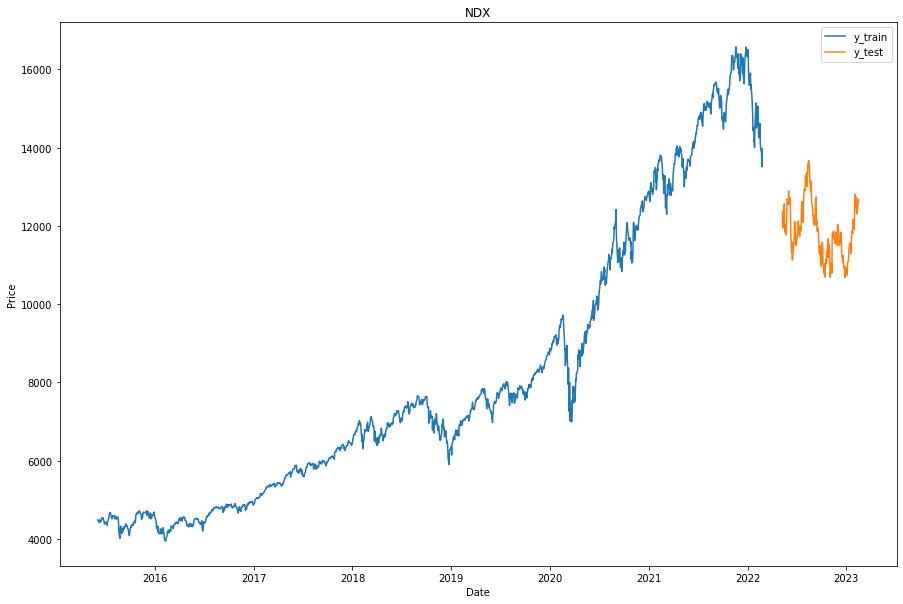

In [175]:
plot_prices('NDX',False,y_train,y_test)

### 4.2 PyTorch Model #1

In [183]:
class Model1(nn.Module):
    def __init__(self, input_size):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(input_size, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 8)
        self.fc6 = nn.Linear(8, 1)
        
        self.dropout1 = nn.Dropout(p=0.10)
        self.dropout2 = nn.Dropout(p=0.20)

    def forward(self, x):
        #batch
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

EPOCH: 0 | Loss: 209867984.0
EPOCH: 10 | Loss: 209078368.0
EPOCH: 20 | Loss: 200554240.0
EPOCH: 30 | Loss: 167422768.0
EPOCH: 40 | Loss: 103355624.0
EPOCH: 50 | Loss: 39800284.0
EPOCH: 60 | Loss: 15168692.0
EPOCH: 70 | Loss: 7754653.5
EPOCH: 80 | Loss: 6252031.5
EPOCH: 90 | Loss: 5814136.5
EPOCH: 100 | Loss: 4839847.5
EPOCH: 110 | Loss: 3064463.75
EPOCH: 120 | Loss: 2379261.75
EPOCH: 130 | Loss: 1802380.875


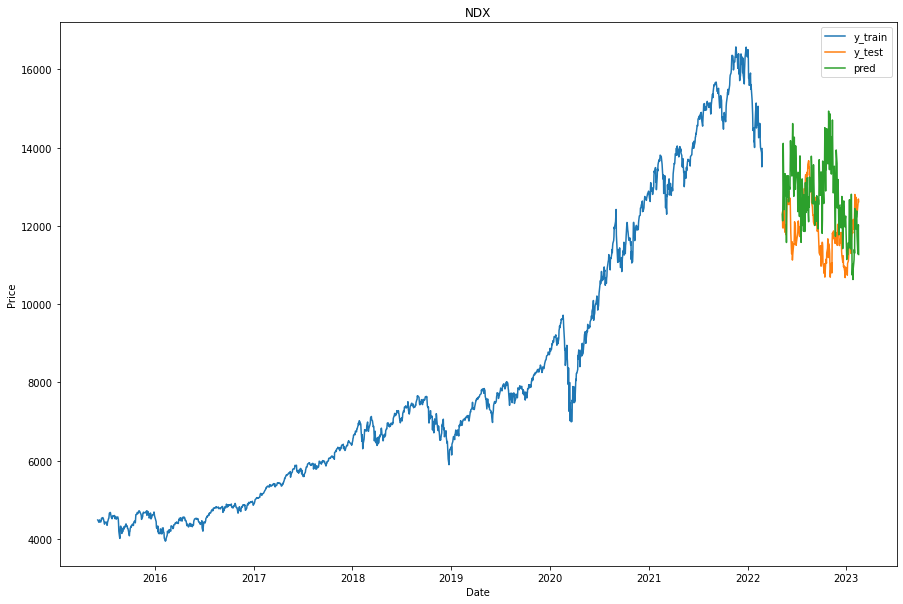

In [179]:
LR = 0.00001
BATCH_SIZE = 20

model_1 = Model1(X_train.shape[1]).to(device)

optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=LR,
                             weight_decay=1e-3)
criterion = nn.MSELoss()

for epoch in range(140):
    for i in range(0, len(X_train), BATCH_SIZE):
        batch_x = X_train[i:i+BATCH_SIZE].float().to(device)
        batch_y = y_train[i:i+BATCH_SIZE].float().to(device)
        
        optimizer.zero_grad()
        outputs = model_1(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
    if epoch%10==0:
        print(f"EPOCH: {epoch} | Loss: {loss.item()}")
        
y_pred = model_1(X_test.float().to(device)).cpu().detach().numpy()
plot_prices('NDX',False,y_train, y_test, y_pred)

### 4.3 PyTorch Model #2

In [184]:
class Model2(nn.Module):
    def __init__(self,input_size):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(input_size, 4096)
        self.fc2 = nn.Linear(4096, 1024)
        self.fc3 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 64)
        self.fc5 = nn.Linear(64, 256)
        self.fc6 = nn.Linear(256, 64)
        self.fc7 = nn.Linear(64, 8)
        self.fc8 = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(p=0.01)
        self.dropout2 = nn.Dropout(p=0.001)
        self.dropout3 = nn.Dropout(p=0.0005)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.dropout2(x)
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.dropout3(x)
        x = F.relu(self.fc7(x))
        x = self.fc8(x)
        return x

EPOCH: 0 | Loss: 209867264.0
EPOCH: 10 | Loss: 209135888.0
EPOCH: 20 | Loss: 178649600.0
EPOCH: 30 | Loss: 46904888.0
EPOCH: 40 | Loss: 10999277.0
EPOCH: 50 | Loss: 7502997.5
EPOCH: 60 | Loss: 5388651.5
EPOCH: 70 | Loss: 3725113.25
EPOCH: 80 | Loss: 2423918.25
EPOCH: 90 | Loss: 1403159.5
EPOCH: 100 | Loss: 770264.6875
EPOCH: 110 | Loss: 394104.25
EPOCH: 120 | Loss: 285158.59375
EPOCH: 130 | Loss: 480118.625


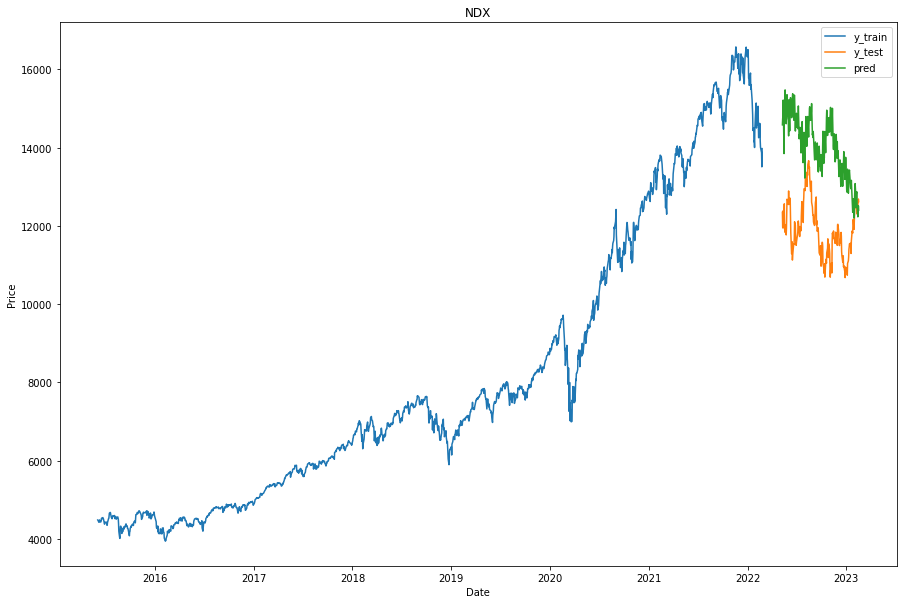

In [180]:
LR = 0.00001
BATCH_SIZE = 40

model_2 = Model2(X_train.shape[1]).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                             lr=LR,
                             weight_decay=1e-3,
                             eps=1e-10)

for epoch in range(140):
    for i in range(0, len(X_train), BATCH_SIZE):
        batch_x = X_train[i:i+BATCH_SIZE].float().to(device)
        batch_y = y_train[i:i+BATCH_SIZE].float().to(device)

        optimizer.zero_grad()
        outputs = model_2(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if epoch%10==0:
        print(f"EPOCH: {epoch} | Loss: {loss.item()}")

y_pred = model_2(X_test.float().to(device)).cpu().detach().numpy()
plot_prices('NDX',False,y_train, y_test, y_pred)

### 4.4 PyTorch Model #3

In [185]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 512)
        self.fc2 = nn.Linear(512, 2048)
        self.fc3 = nn.Linear(2048, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 64)
        self.fc7 = nn.Linear(64, 8)
        self.fc8 = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(p=0.10)
        self.dropout2 = nn.Dropout(p=0.05)
        self.dropout3 = nn.Dropout(p=0.05)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout1(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.dropout2(x)
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.dropout3(x)
        x = F.relu(self.fc7(x))
        x = self.fc8(x)
        return x

EPOCH: 0 | Loss: 209866784.0
EPOCH: 10 | Loss: 209837472.0
EPOCH: 20 | Loss: 207446576.0
EPOCH: 30 | Loss: 178912704.0
EPOCH: 40 | Loss: 82426592.0
EPOCH: 50 | Loss: 18066062.0
EPOCH: 60 | Loss: 8490728.0
EPOCH: 70 | Loss: 6258690.5
EPOCH: 80 | Loss: 4944216.5
EPOCH: 90 | Loss: 4741940.0
EPOCH: 100 | Loss: 4123027.5
EPOCH: 110 | Loss: 3788056.25
EPOCH: 120 | Loss: 3207292.75
EPOCH: 130 | Loss: 896155.0625


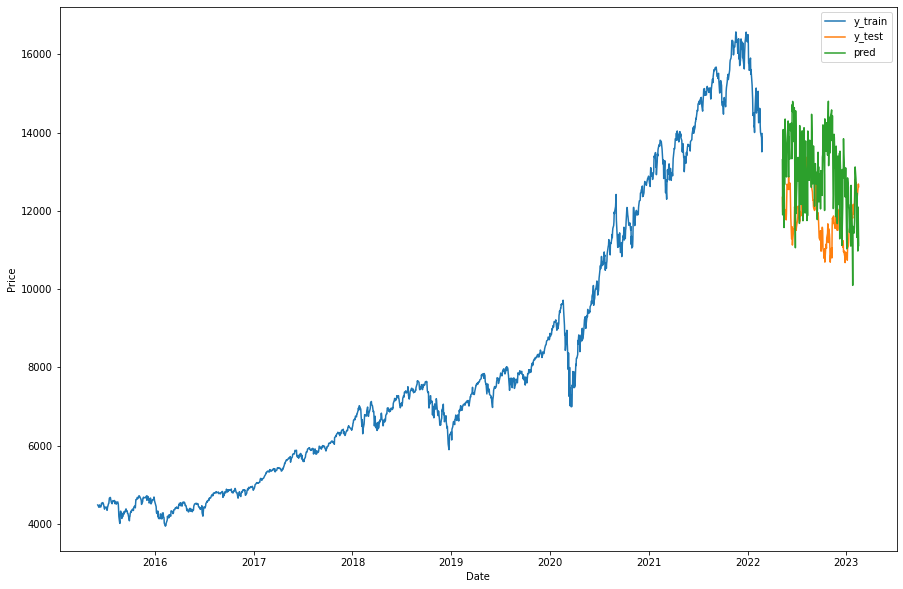

In [64]:
LR = 0.00001
BATCH_SIZE = 60

model_3 = Model3().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                             lr=LR,
                             weight_decay=1e-3,
                             eps=1e-10)

for epoch in range(140):
    for i in range(0, len(X_train), BATCH_SIZE):
        batch_x = X_train[i:i+BATCH_SIZE].float().to(device)
        batch_y = y_train[i:i+BATCH_SIZE].float().to(device)

        optimizer.zero_grad()
        outputs = model_3(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if epoch%10==0:
        print(f"EPOCH: {epoch} | Loss: {loss.item()}")

y_pred = model_3(X_test.float().to(device)).cpu().detach().numpy()
plot_prices('NDX',False,y_train, y_test, y_pred)

### 4.4 Optimization

We selected Model 1 as the best model. The inclusion of a buffer zone effectively eliminated any potential data leaks, which often result in models that are overly optimistic and therefore useless for practical applications and production use.

In [186]:
def optimization(name,LR,BATCH_SIZE):
    X_train, y_train, X_test, y_test, df_DATE, train_split, test_split= Preparation_For_Future_Prediction(df,name,50,55)
    
    model_1 = Model1(X_train.shape[1]).to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model_1.parameters(),
                                 lr=LR,
                                 weight_decay=1e-3,
                                 eps=1e-10)
    
    
    print(f"---------------- LR: {LR} | BATCH_SIZE: {BATCH_SIZE}-------------------------")
    
    for epoch in range(140):
        for i in range(0, len(X_train), BATCH_SIZE):
            batch_x = X_train[i:i+BATCH_SIZE].float().to(device)
            batch_y = y_train[i:i+BATCH_SIZE].float().to(device)

            optimizer.zero_grad()
            outputs = model_1(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()


    y_pred = model_1(X_test.float().to(device)).cpu().detach().numpy()
    plot_prices('NDX',False,y_train, y_test, y_pred)

#### Changing Learning Rate

---------------- LR: 1e-05 | BATCH_SIZE: 20-------------------------


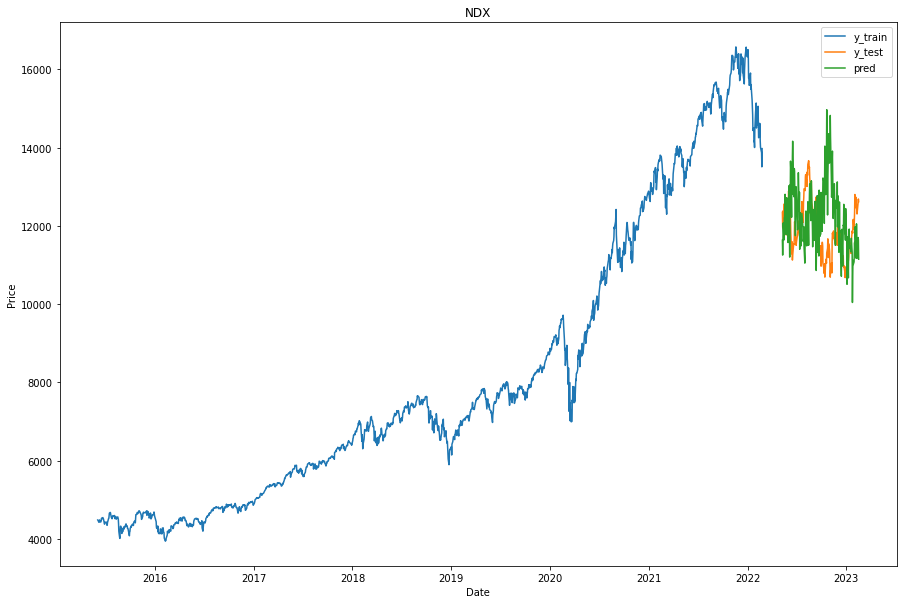

---------------- LR: 0.0001 | BATCH_SIZE: 20-------------------------


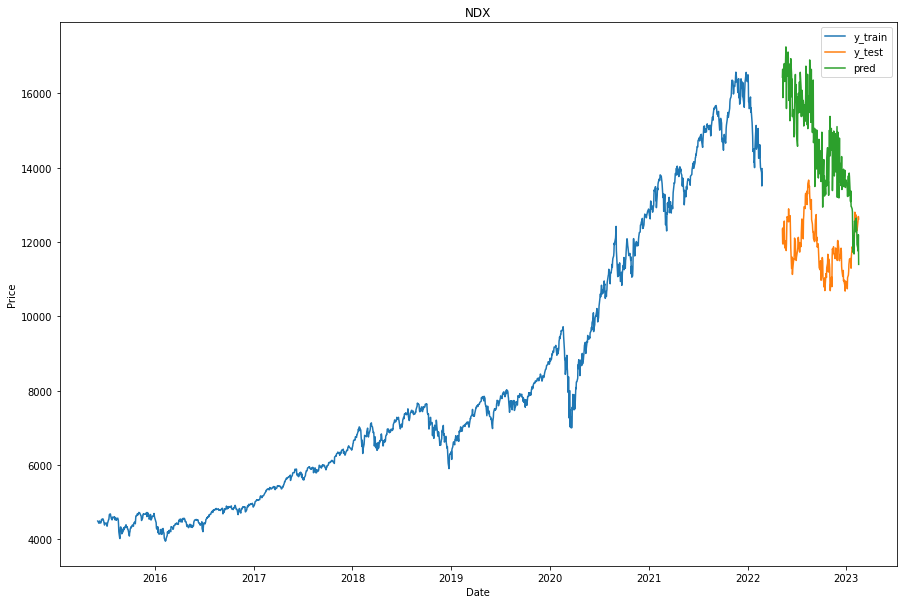

In [187]:
for i in [0.00001,0.0001]:
    optimization('NDX',i,20)

#### Changing Batch Size

---------------- LR: 1e-05 | BATCH_SIZE: 10-------------------------


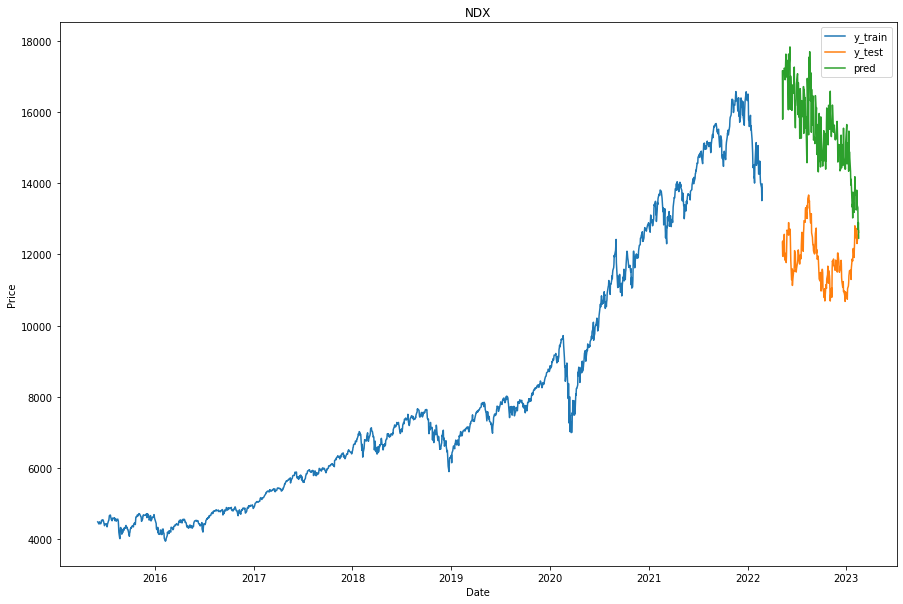

---------------- LR: 1e-05 | BATCH_SIZE: 20-------------------------


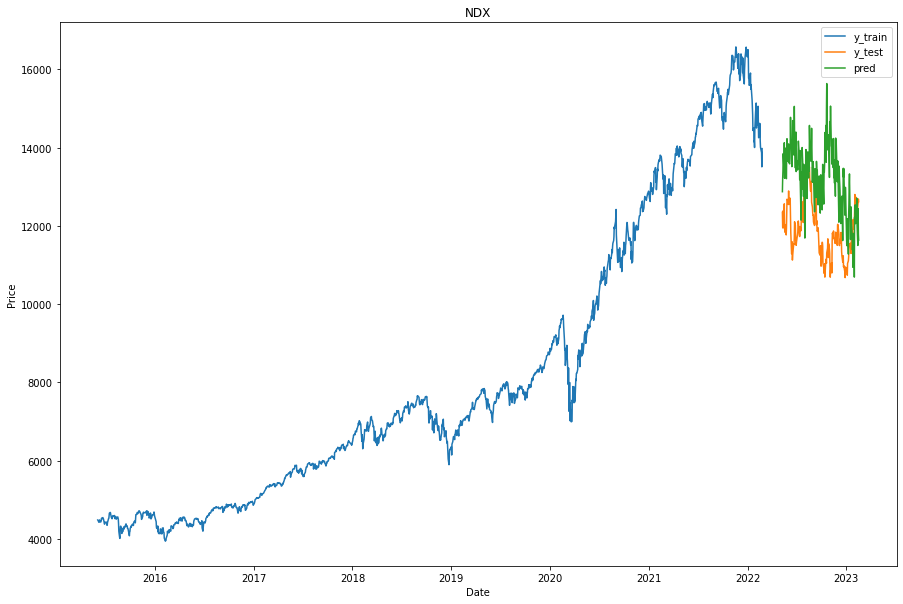

In [188]:
for i in range(10,30,10):
    optimization('NDX',0.00001,i)

# 5. Model Deployment

### 5.1 Final Model

In [189]:
def final_model(name):
    
    X_train, y_train, X_test, y_test, df_DATE, train_split, test_split= Preparation_For_Future_Prediction(df,name,50,55)
    
    class Final(nn.Module):
        def __init__(self, input_size):
            super(Final, self).__init__()
            self.fc1 = nn.Linear(input_size, 2048)
            self.fc2 = nn.Linear(2048, 512)
            self.fc3 = nn.Linear(512, 128)
            self.fc4 = nn.Linear(128, 32)
            self.fc5 = nn.Linear(32, 8)
            self.fc6 = nn.Linear(8, 1)

            self.dropout1 = nn.Dropout(p=0.10)
            self.dropout2 = nn.Dropout(p=0.20)

        def forward(self, x):
            #batch
            x = F.relu(self.fc1(x))
            x = self.dropout1(x)
            x = F.relu(self.fc2(x))
            x = self.dropout2(x)
            x = F.relu(self.fc3(x))
            x = F.relu(self.fc4(x))
            x = F.relu(self.fc5(x))
            x = self.fc6(x)
            return x
    
    LR = 0.00001
    BATCH_SIZE = 20
    
    model_final = Final(X_train.shape[1]).to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model_final.parameters(),
                                 lr=LR,
                                 weight_decay=1e-3,
                                 eps=1e-10)
    
    for epoch in range(140):
        for i in range(0, len(X_train), BATCH_SIZE):
            batch_x = X_train[i:i+BATCH_SIZE].float().to(device)
            batch_y = y_train[i:i+BATCH_SIZE].float().to(device)

            optimizer.zero_grad()
            outputs = model_final(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()


    y_pred = model_final(X_test.float().to(device)).cpu().detach().numpy()
    
    plot_prices(name,True,y_train, y_test, y_pred)

### 5.2 Demo Testing

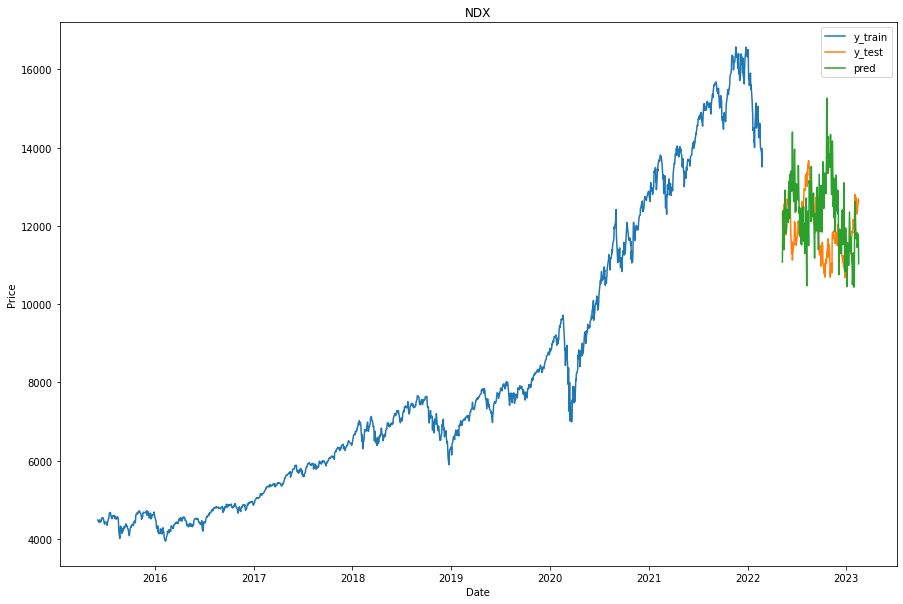

In [190]:
final_model('NDX')

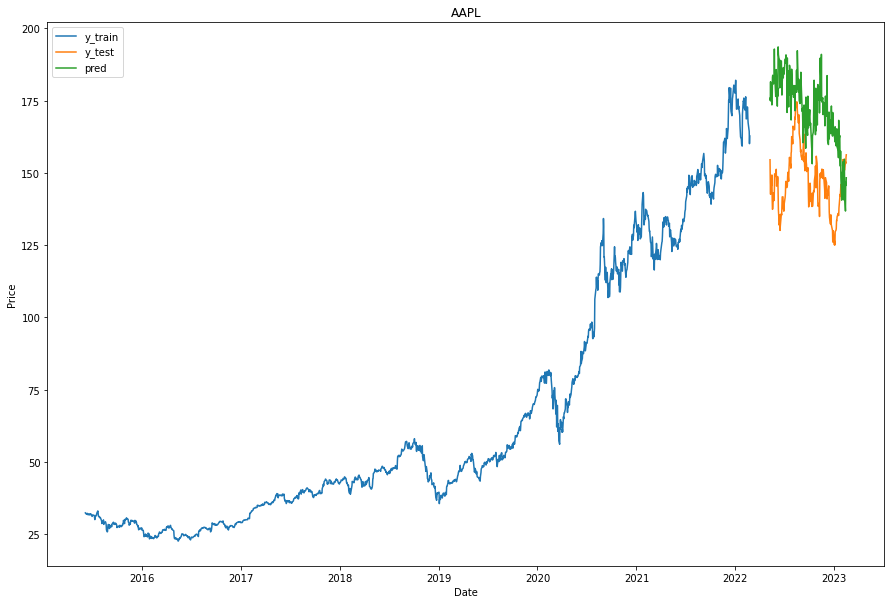

In [191]:
final_model('AAPL')

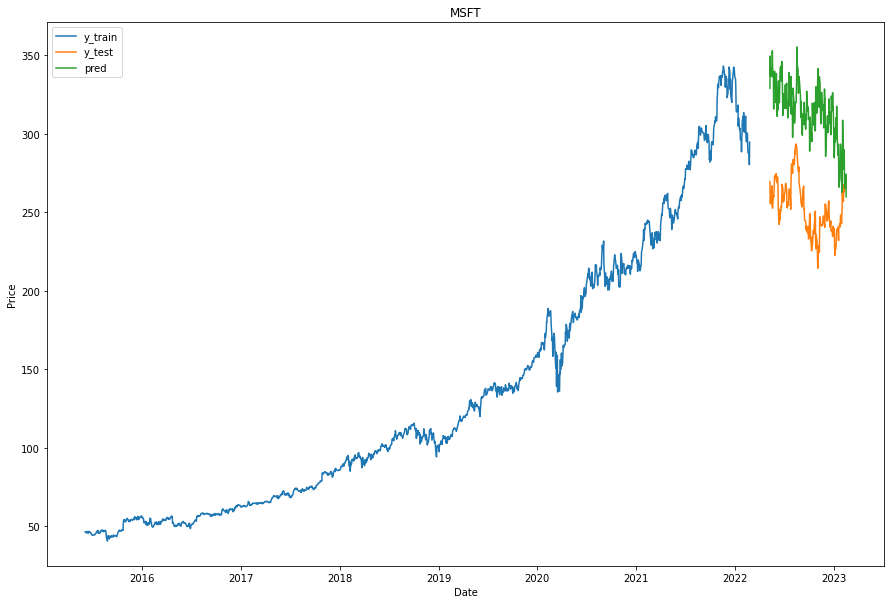

In [192]:
final_model('MSFT')

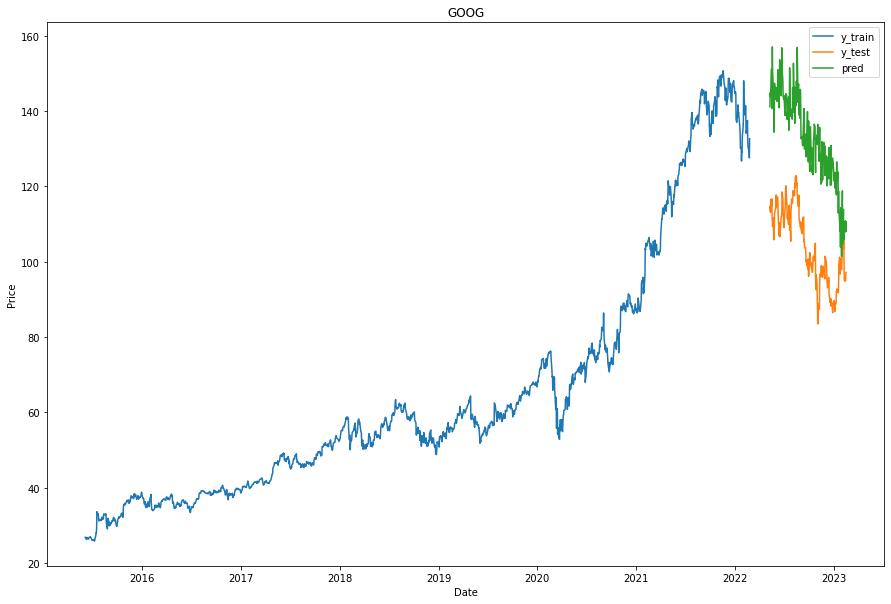

In [193]:
final_model('GOOG')

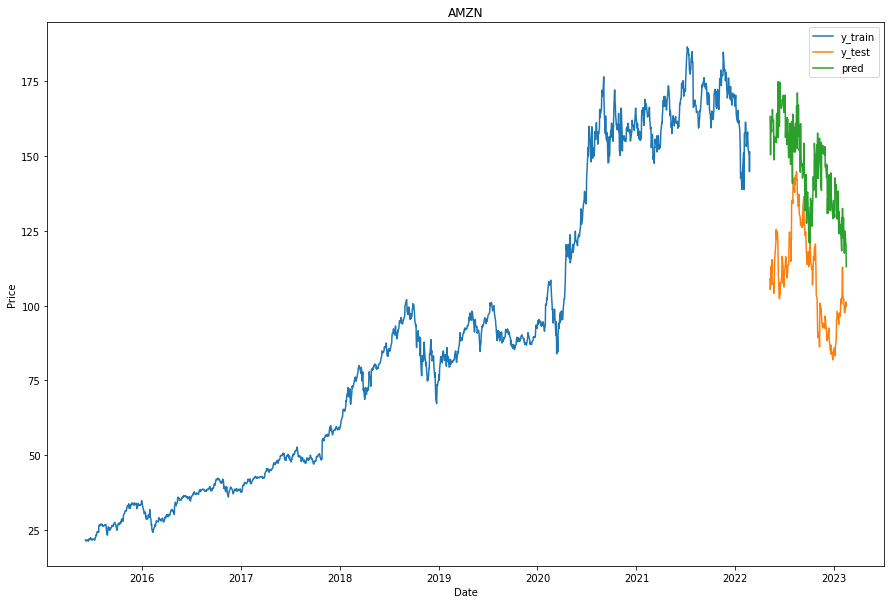

In [194]:
final_model('AMZN')

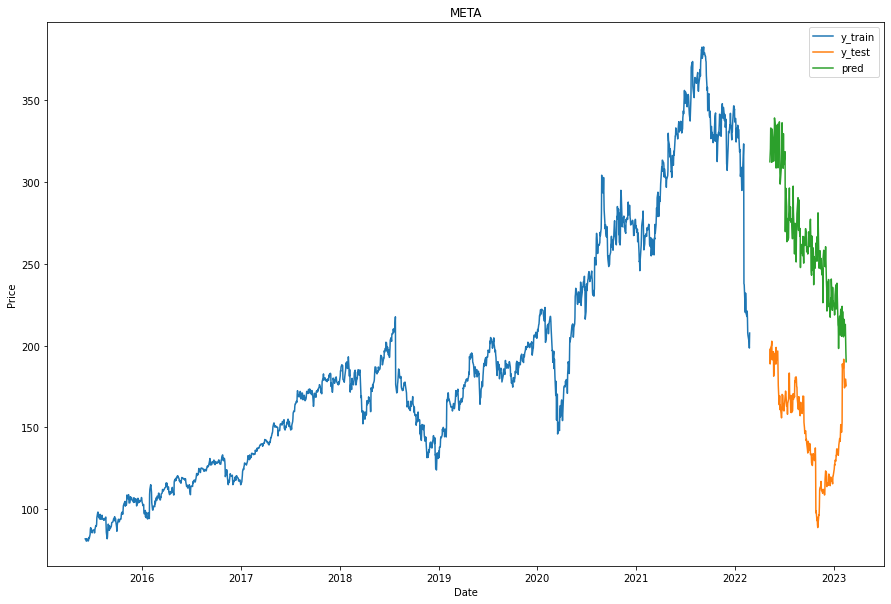

In [195]:
final_model('META')